In [1]:
import pandas as pd
from geopy.distance import geodesic
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../results/NN-Eval.csv')
df

,Image,Location,Type,Notes,Best Match 1,Best Match 2,Predicted Location,Issues
0,iss065e012968,"23.742209, 120.791696",night,Taiwan,NaN,NaN,NaN,Match not found.
1,iss065e012854,"24.399968, 39.580929","city, desert","Medina, Saudi Arabia","24.243869682062538, 34.50965802339215","23.575597653538267, 31.96061662545327","23.909733667800403, 33.23513732442271",NaN
2,iss065e012122,"21.916841, 17.409515","mountains, desert","Tibesti Mountains, Chad","21.859068677152404, 9.468757021178105","22.869221341312457, 11.471575262415776","22.36414500923243, 10.470166141796941",NaN
3,iss040e092721,"37.901332, 15.333352","volcano, island",Mount Etna and Sicily,"37.99098385053961, 16.621670698969467","37.99098385053961, 14.983001228865902","37.99098385053961, 15.802335963917685",NaN
4,iss040e125148,"51.959667, 4.072454",port,Maasvlakte Rotterdam,"52.16862486467835, 4.377214208934959","51.264086859953494, 3.102693509965519","51.71635586231592, 3.739953859450239",NaN
...,...,...,...,...,...,...,...,...
139,iss056e126635,"22.511201, 32.948643",NaN,"Lake Nasser, Egypt","23.467633252740086, 34.45256236563611","23.299183131042493, 31.72144658213017","23.38340819189129, 33.08700447388314",NaN
140,iss036e049939,"-3.061136, 37.352760",volcano,"Mount Kilimanjaro, Tanzania","-1.4807118710086793, 35.69675412439839","-3.117553993689355, 36.42505166666665","-2.299132932349017, 36.06090289553252",NaN
141,iss057e114906,"33.245924, -119.475401",island,"San Nicolas Island, California",NaN,NaN,NaN,Match not found.
142,iss055e114459,"-17.620422, 139.094148",NaN,"Gulf of Carpentaria, Australia","-21.388845411417968, 139.35405069896947","-21.55756514109225, 137.35123245773178","-21.47320527625511, 138.35264157835064",NaN


In [3]:
def calculate_distance(coord1, coord2):
    """
    Calculate distance between two coordinates
    """
    try:
        return geodesic(coord1, coord2).km
    except:
        return np.nan

def extract_coordinates(coord_string):
    """
    Extract coordinates from a string
    """
    if pd.isna(coord_string):
        return np.nan, np.nan
    coords = coord_string.split(", ")
    return float(coords[0]), float(coords[1])

# Extract coordinates for actual location, best match 1, best match 2, and predicted location
df['Location_coords'] = df['Location'].apply(lambda x: extract_coordinates(x))
df['Best_Match_1_coords'] = df['Best Match 1'].apply(lambda x: extract_coordinates(x))
df['Best_Match_2_coords'] = df['Best Match 2'].apply(lambda x: extract_coordinates(x))
df['Predicted_Location_coords'] = df['Predicted Location'].apply(lambda x: extract_coordinates(x))

# Calculate distances
df['Error_Best_Match_1'] = df.apply(lambda x: calculate_distance(x['Location_coords'], x['Best_Match_1_coords']), axis=1)
df['Error_Best_Match_2'] = df.apply(lambda x: calculate_distance(x['Location_coords'], x['Best_Match_2_coords']), axis=1)
df['Error_Predicted_Location'] = df.apply(lambda x: calculate_distance(x['Location_coords'], x['Predicted_Location_coords']), axis=1)

df

,Image,Location,Type,Notes,Best Match 1,Best Match 2,Predicted Location,Issues,Location_coords,Best_Match_1_coords,Best_Match_2_coords,Predicted_Location_coords,Error_Best_Match_1,Error_Best_Match_2,Error_Predicted_Location
0,iss065e012968,"23.742209, 120.791696",night,Taiwan,NaN,NaN,NaN,Match not found.,"(23.742209, 120.791696)","(nan, nan)","(nan, nan)","(nan, nan)",NaN,NaN,NaN
1,iss065e012854,"24.399968, 39.580929","city, desert","Medina, Saudi Arabia","24.243869682062538, 34.50965802339215","23.575597653538267, 31.96061662545327","23.909733667800403, 33.23513732442271",NaN,"(24.399968, 39.580929)","(24.243869682062538, 34.50965802339215)","(23.575597653538267, 31.96061662545327)","(23.909733667800403, 33.23513732442271)",514.980654,780.705846,647.144176
2,iss065e012122,"21.916841, 17.409515","mountains, desert","Tibesti Mountains, Chad","21.859068677152404, 9.468757021178105","22.869221341312457, 11.471575262415776","22.36414500923243, 10.470166141796941",NaN,"(21.916841, 17.409515)","(21.859068677152404, 9.468757021178105)","(22.869221341312457, 11.471575262415776)","(22.36414500923243, 10.470166141796941)",820.555766,620.439067,717.510816
3,iss040e092721,"37.901332, 15.333352","volcano, island",Mount Etna and Sicily,"37.99098385053961, 16.621670698969467","37.99098385053961, 14.983001228865902","37.99098385053961, 15.802335963917685",NaN,"(37.901332, 15.333352)","(37.99098385053961, 16.621670698969467)","(37.99098385053961, 14.983001228865902)","(37.99098385053961, 15.802335963917685)",113.674335,32.362486,42.406126
4,iss040e125148,"51.959667, 4.072454",port,Maasvlakte Rotterdam,"52.16862486467835, 4.377214208934959","51.264086859953494, 3.102693509965519","51.71635586231592, 3.739953859450239",NaN,"(51.959667, 4.072454)","(52.16862486467835, 4.377214208934959)","(51.264086859953494, 3.102693509965519)","(51.71635586231592, 3.739953859450239)",31.263496,102.476481,35.469755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,iss056e126635,"22.511201, 32.948643",NaN,"Lake Nasser, Egypt","23.467633252740086, 34.45256236563611","23.299183131042493, 31.72144658213017","23.38340819189129, 33.08700447388314",NaN,"(22.511201, 32.948643)","(23.467633252740086, 34.45256236563611)","(23.299183131042493, 31.72144658213017)","(23.38340819189129, 33.08700447388314)",187.068690,153.186047,97.627907
140,iss036e049939,"-3.061136, 37.352760",volcano,"Mount Kilimanjaro, Tanzania","-1.4807118710086793, 35.69675412439839","-3.117553993689355, 36.42505166666665","-2.299132932349017, 36.06090289553252",NaN,"(-3.061136, 37.35276)","(-1.4807118710086793, 35.69675412439839)","(-3.117553993689355, 36.42505166666665)","(-2.299132932349017, 36.06090289553252)",253.905981,103.311463,166.539735
141,iss057e114906,"33.245924, -119.475401",island,"San Nicolas Island, California",NaN,NaN,NaN,Match not found.,"(33.245924, -119.475401)","(nan, nan)","(nan, nan)","(nan, nan)",NaN,NaN,NaN
142,iss055e114459,"-17.620422, 139.094148",NaN,"Gulf of Carpentaria, Australia","-21.388845411417968, 139.35405069896947","-21.55756514109225, 137.35123245773178","-21.47320527625511, 138.35264157835064",NaN,"(-17.620422, 139.094148)","(-21.388845411417968, 139.35405069896947)","(-21.55756514109225, 137.35123245773178)","(-21.47320527625511, 138.35264157835064)",418.049484,472.626432,433.536458


In [4]:


# Calculate error rates
error_rate_best_match_1 = df['Error_Best_Match_1'].mean()
error_rate_best_match_2 = df['Error_Best_Match_2'].mean()
error_rate_predicted_location = df['Error_Predicted_Location'].mean()

# Analysis of issues
issue_counts = df['Issues'].value_counts()

print("Error rate for best match 1: {:.2f} km".format(error_rate_best_match_1))
print("Error rate for best match 2: {:.2f} km".format(error_rate_best_match_2))
print("Error rate for predicted location: {:.2f} km".format(error_rate_predicted_location))
print(issue_counts)

Error rate for best match 1: 339.26 km
Error rate for best match 2: 337.68 km
Error rate for predicted location: 330.52 km
Issues
Match not found.                                         33
GPS data is incomplete or not available in the image.     2
Only one match found.                                     1
Name: count, dtype: int64


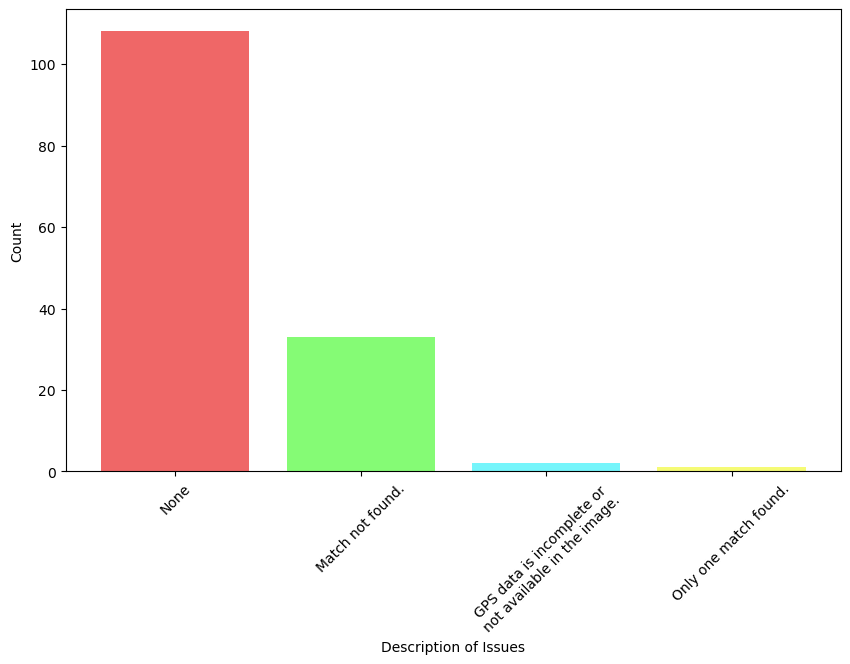

In [5]:
issue_counts = {
    "None": 108,
    "Match not found.": 33,
    "GPS data is incomplete or\nnot available in the image.": 2,
    "Only one match found.": 1
}

# Creating the bar graph
plt.figure(figsize=(10, 6))
plt.bar(issue_counts.keys(), issue_counts.values(), color=['#EF6767', '#85FB75', '#75F5FB', '#F5FB75'])
plt.xlabel('Description of Issues')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

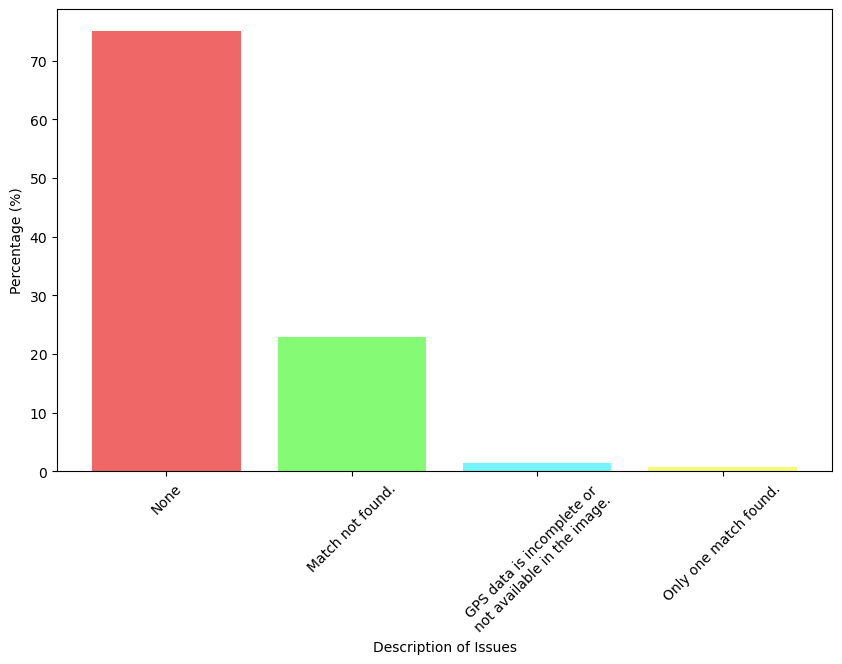

In [6]:
# Calculating percentages
total_issues = sum(issue_counts.values())
issue_percentages = {k: (v / total_issues) * 100 for k, v in issue_counts.items()}

# Creating the bar graph with percentages
plt.figure(figsize=(10, 6))
plt.bar(issue_percentages.keys(), issue_percentages.values(), color=['#EF6767', '#85FB75', '#75F5FB', '#F5FB75'])
plt.xlabel('Description of Issues')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

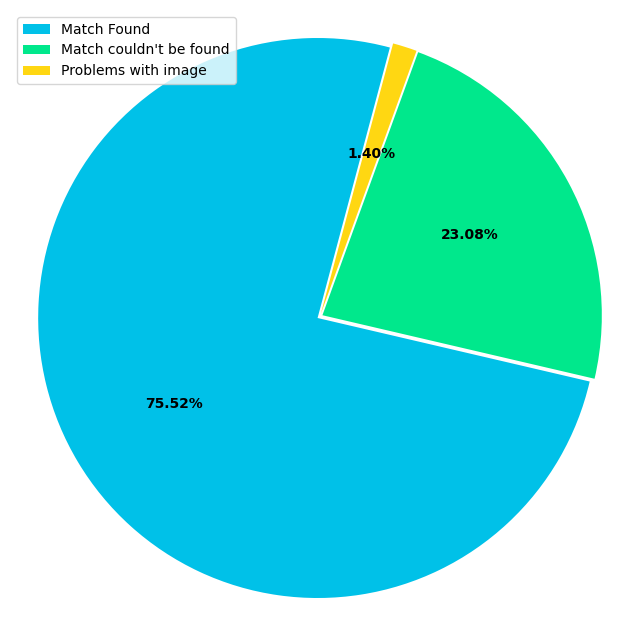

In [7]:
# Grouping "Match not found.", "GPS data is incomplete or not available in the image.", and "Only one match found." into one category
grouped_issues = {
    "Match Found": issue_counts["None"],
    "Match couldn't be found": issue_counts["Match not found."], 
     "Problems with image": issue_counts["GPS data is incomplete or\nnot available in the image."]
}

# Colors for the pie chart
colors = ['#00C1E8', '#00E88C', '#FFD712']

# Creating the pie chart
plt.figure(figsize=(8, 8))
_, _, autotexts = plt.pie(grouped_issues.values(), colors=colors,  autopct='%.2f%%', startangle=75, explode=(0.01, 0.01, 0.01))
for autotext in autotexts:
    autotext.set_weight('bold')
plt.legend(grouped_issues.keys(), loc="upper left")
plt.axis('equal')
plt.show()

In [10]:
def calculate_lat_long_error(coord1, coord2):
    """
    Calculate the difference in latitude and longitude between two coordinates.
    """
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    # Calculate differences
    lat_error = abs(lat1 - lat2)
    lon_error = abs(lon1 - lon2)
    
    return lat_error, lon_error



# Calculate distances
df['Error_Best_Match_1_deg'] = df.apply(lambda x: calculate_lat_long_error(x['Location_coords'], x['Best_Match_1_coords']), axis=1)
df['Error_Best_Match_2_deg'] = df.apply(lambda x: calculate_lat_long_error(x['Location_coords'], x['Best_Match_2_coords']), axis=1)
df['Error_Predicted_Location_deg'] = df.apply(lambda x: calculate_lat_long_error(x['Location_coords'], x['Predicted_Location_coords']), axis=1)

df

,Image,Location,Type,Notes,Best Match 1,Best Match 2,Predicted Location,Issues,Location_coords,Best_Match_1_coords,Best_Match_2_coords,Predicted_Location_coords,Error_Best_Match_1,Error_Best_Match_2,Error_Predicted_Location,Error_Best_Match_1_deg,Error_Best_Match_2_deg,Error_Predicted_Location_deg
0,iss065e012968,"23.742209, 120.791696",night,Taiwan,NaN,NaN,NaN,Match not found.,"(23.742209, 120.791696)","(nan, nan)","(nan, nan)","(nan, nan)",NaN,NaN,NaN,"(nan, nan)","(nan, nan)","(nan, nan)"
1,iss065e012854,"24.399968, 39.580929","city, desert","Medina, Saudi Arabia","24.243869682062538, 34.50965802339215","23.575597653538267, 31.96061662545327","23.909733667800403, 33.23513732442271",NaN,"(24.399968, 39.580929)","(24.243869682062538, 34.50965802339215)","(23.575597653538267, 31.96061662545327)","(23.909733667800403, 33.23513732442271)",514.980654,780.705846,647.144176,"(0.1560983179374631, 5.071270976607849)","(0.824370346461734, 7.620312374546728)","(0.49023433219959855, 6.3457916755772885)"
2,iss065e012122,"21.916841, 17.409515","mountains, desert","Tibesti Mountains, Chad","21.859068677152404, 9.468757021178105","22.869221341312457, 11.471575262415776","22.36414500923243, 10.470166141796941",NaN,"(21.916841, 17.409515)","(21.859068677152404, 9.468757021178105)","(22.869221341312457, 11.471575262415776)","(22.36414500923243, 10.470166141796941)",820.555766,620.439067,717.510816,"(0.05777232284759748, 7.940757978821894)","(0.9523803413124554, 5.937939737584223)","(0.44730400923242897, 6.939348858203058)"
3,iss040e092721,"37.901332, 15.333352","volcano, island",Mount Etna and Sicily,"37.99098385053961, 16.621670698969467","37.99098385053961, 14.983001228865902","37.99098385053961, 15.802335963917685",NaN,"(37.901332, 15.333352)","(37.99098385053961, 16.621670698969467)","(37.99098385053961, 14.983001228865902)","(37.99098385053961, 15.802335963917685)",113.674335,32.362486,42.406126,"(0.08965185053961022, 1.2883186989694675)","(0.08965185053961022, 0.3503507711340976)","(0.08965185053961022, 0.46898396391768493)"
4,iss040e125148,"51.959667, 4.072454",port,Maasvlakte Rotterdam,"52.16862486467835, 4.377214208934959","51.264086859953494, 3.102693509965519","51.71635586231592, 3.739953859450239",NaN,"(51.959667, 4.072454)","(52.16862486467835, 4.377214208934959)","(51.264086859953494, 3.102693509965519)","(51.71635586231592, 3.739953859450239)",31.263496,102.476481,35.469755,"(0.20895786467834654, 0.30476020893495903)","(0.6955801400465091, 0.9697604900344805)","(0.2433111376840813, 0.33250014054976074)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,iss056e126635,"22.511201, 32.948643",NaN,"Lake Nasser, Egypt","23.467633252740086, 34.45256236563611","23.299183131042493, 31.72144658213017","23.38340819189129, 33.08700447388314",NaN,"(22.511201, 32.948643)","(23.467633252740086, 34.45256236563611)","(23.299183131042493, 31.72144658213017)","(23.38340819189129, 33.08700447388314)",187.068690,153.186047,97.627907,"(0.9564322527400861, 1.503919365636115)","(0.7879821310424937, 1.227196417869827)","(0.8722071918912917, 0.13836147388314401)"
140,iss036e049939,"-3.061136, 37.352760",volcano,"Mount Kilimanjaro, Tanzania","-1.4807118710086793, 35.69675412439839","-3.117553993689355, 36.42505166666665","-2.299132932349017, 36.06090289553252",NaN,"(-3.061136, 37.35276)","(-1.4807118710086793, 35.69675412439839)","(-3.117553993689355, 36.42505166666665)","(-2.299132932349017, 36.06090289553252)",253.905981,103.311463,166.539735,"(1.5804241289913206, 1.6560058756016147)","(0.05641799368935496, 0.9277083333333564)","(0.762003067650983, 1.291857104467482)"
141,iss057e114906,"33.245924, -119.475401",island,"San Nicolas Island, California",NaN,NaN,NaN,Match not found.,"(33.245924, -119.475401)","(nan, nan)","(nan, nan)","(nan, nan)",NaN,NaN,NaN,"(nan, nan)","(nan, nan)","(nan, nan)"
142,iss055e114459,"-17.620422, 139.094148",NaN,"Gulf of Carpentaria, Australia","-21.388845411417968, 139.35405069896947","-21.557565

In [16]:
err_best_match_1_lat = df['Error_Best_Match_1_deg'].apply(lambda x: x[0]).mean()
err_best_match_1_lon = df['Error_Best_Match_1_deg'].apply(lambda x: x[1]).mean()
err_best_match_2_lat = df['Error_Best_Match_2_deg'].apply(lambda x: x[0]).mean()
err_best_match_2_lon = df['Error_Best_Match_2_deg'].apply(lambda x: x[1]).mean()
err_predicted_location_lat = df['Error_Predicted_Location_deg'].apply(lambda x: x[0]).mean()
err_predicted_location_lon = df['Error_Predicted_Location_deg'].apply(lambda x: x[1]).mean()

print("Error rate in lat and long for best match 1: {:.2f} deg, {:.2f} deg".format(err_best_match_1_lat, err_best_match_1_lon))
print("Error rate in lat and long for best match 2: {:.2f} deg, {:.2f} deg".format(err_best_match_2_lat, err_best_match_2_lon))
print("Error rate in lat and long for predicted location: {:.2f} deg, {:.2f} deg".format(err_predicted_location_lat, err_predicted_location_lon))

Error rate in lat and long for best match 1: 1.86 deg, 2.50 deg
Error rate in lat and long for best match 2: 1.76 deg, 2.55 deg
Error rate in lat and long for predicted location: 1.79 deg, 2.45 deg


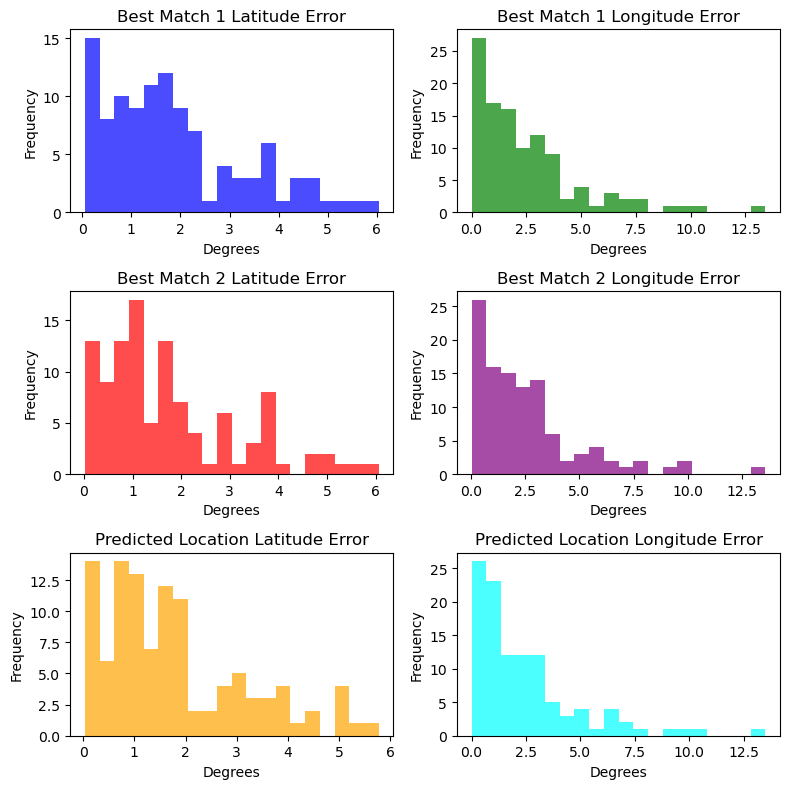

In [22]:
# Extract latitude and longitude errors for best match 1
df['Error_Best_Match_1_Lat'] = df['Error_Best_Match_1_deg'].apply(lambda x: x[0])
df['Error_Best_Match_1_Lon'] = df['Error_Best_Match_1_deg'].apply(lambda x: x[1])

# Extract latitude and longitude errors for best match 2
df['Error_Best_Match_2_Lat'] = df['Error_Best_Match_2_deg'].apply(lambda x: x[0])
df['Error_Best_Match_2_Lon'] = df['Error_Best_Match_2_deg'].apply(lambda x: x[1])

# Extract latitude and longitude errors for predicted location
df['Error_Predicted_Location_Lat'] = df['Error_Predicted_Location_deg'].apply(lambda x: x[0])
df['Error_Predicted_Location_Lon'] = df['Error_Predicted_Location_deg'].apply(lambda x: x[1])

# Plot histograms for latitude errors
plt.figure(figsize=(8, 8))

# Histogram for Best Match 1 Latitude Error
plt.subplot(3, 2, 1)
plt.hist(df['Error_Best_Match_1_Lat'].dropna(), bins=20, color='blue', alpha=0.7)
plt.title('Best Match 1 Latitude Error')
plt.xlabel('Degrees')
plt.ylabel('Frequency')

# Histogram for Best Match 1 Longitude Error
plt.subplot(3, 2, 2)
plt.hist(df['Error_Best_Match_1_Lon'].dropna(), bins=20, color='green', alpha=0.7)
plt.title('Best Match 1 Longitude Error')
plt.xlabel('Degrees')
plt.ylabel('Frequency')

# Histogram for Best Match 2 Latitude Error
plt.subplot(3, 2, 3)
plt.hist(df['Error_Best_Match_2_Lat'].dropna(), bins=20, color='red', alpha=0.7)
plt.title('Best Match 2 Latitude Error')
plt.xlabel('Degrees')
plt.ylabel('Frequency')

# Histogram for Best Match 2 Longitude Error
plt.subplot(3, 2, 4)
plt.hist(df['Error_Best_Match_2_Lon'].dropna(), bins=20, color='purple', alpha=0.7)
plt.title('Best Match 2 Longitude Error')
plt.xlabel('Degrees')
plt.ylabel('Frequency')

# Histogram for Predicted Location Latitude Error
plt.subplot(3, 2, 5)
plt.hist(df['Error_Predicted_Location_Lat'].dropna(), bins=20, color='orange', alpha=0.7)
plt.title('Predicted Location Latitude Error')
plt.xlabel('Degrees')
plt.ylabel('Frequency')

# Histogram for Predicted Location Longitude Error
plt.subplot(3, 2, 6)
plt.hist(df['Error_Predicted_Location_Lon'].dropna(), bins=20, color='cyan', alpha=0.7)
plt.title('Predicted Location Longitude Error')
plt.xlabel('Degrees')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

c:\Users\akalps\anaconda2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\akalps\anaconda2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\akalps\anaconda2023\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\akalps\anaconda2023\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

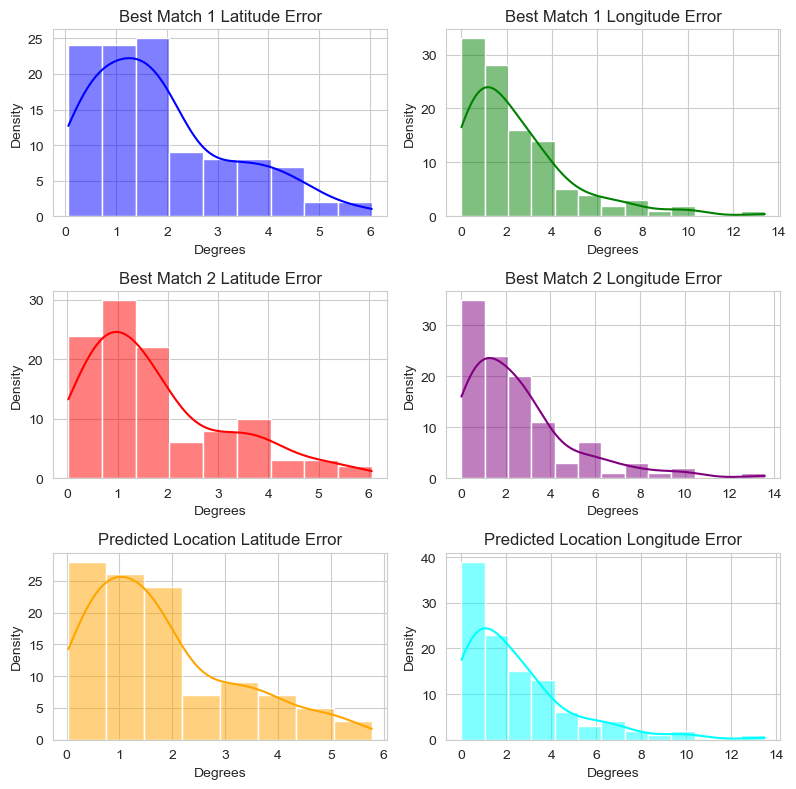

In [25]:
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Plotting histograms/distribution plots for latitude errors using seaborn
plt.figure(figsize=(8, 8))

# Distribution plot for Best Match 1 Latitude Error
plt.subplot(3, 2, 1)
sns.histplot(df['Error_Best_Match_1_Lat'].dropna(), kde=True, color='blue')
plt.title('Best Match 1 Latitude Error')
plt.xlabel('Degrees')
plt.ylabel('Density')

# Distribution plot for Best Match 1 Longitude Error
plt.subplot(3, 2, 2)
sns.histplot(df['Error_Best_Match_1_Lon'].dropna(), kde=True, color='green')
plt.title('Best Match 1 Longitude Error')
plt.xlabel('Degrees')
plt.ylabel('Density')

# Distribution plot for Best Match 2 Latitude Error
plt.subplot(3, 2, 3)
sns.histplot(df['Error_Best_Match_2_Lat'].dropna(), kde=True, color='red')
plt.title('Best Match 2 Latitude Error')
plt.xlabel('Degrees')
plt.ylabel('Density')

# Distribution plot for Best Match 2 Longitude Error
plt.subplot(3, 2, 4)
sns.histplot(df['Error_Best_Match_2_Lon'].dropna(), kde=True, color='purple')
plt.title('Best Match 2 Longitude Error')
plt.xlabel('Degrees')
plt.ylabel('Density')

# Distribution plot for Predicted Location Latitude Error
plt.subplot(3, 2, 5)
sns.histplot(df['Error_Predicted_Location_Lat'].dropna(), kde=True, color='orange')
plt.title('Predicted Location Latitude Error')
plt.xlabel('Degrees')
plt.ylabel('Density')

# Distribution plot for Predicted Location Longitude Error
plt.subplot(3, 2, 6)
sns.histplot(df['Error_Predicted_Location_Lon'].dropna(), kde=True, color='cyan')
plt.title('Predicted Location Longitude Error')
plt.xlabel('Degrees')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


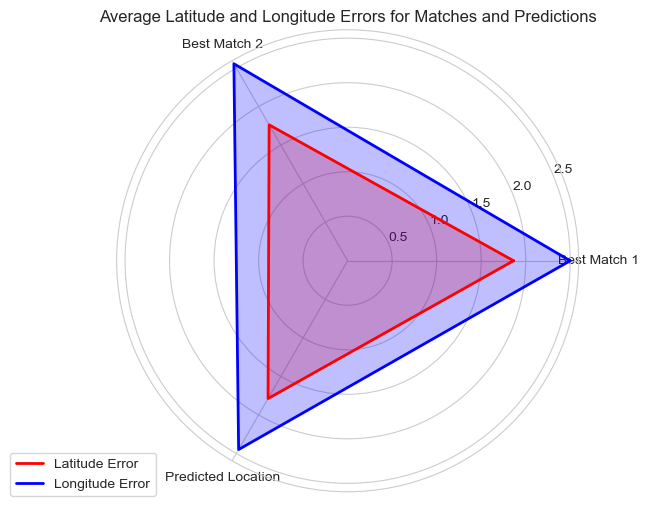

In [26]:
import matplotlib.pyplot as plt
from math import pi

# Assuming 'df' has the necessary error data calculated

# Calculate average errors for each category
categories = ['Best Match 1', 'Best Match 2', 'Predicted Location']
avg_lat_errors = [df['Error_Best_Match_1_Lat'].mean(), df['Error_Best_Match_2_Lat'].mean(), df['Error_Predicted_Location_Lat'].mean()]
avg_lon_errors = [df['Error_Best_Match_1_Lon'].mean(), df['Error_Best_Match_2_Lon'].mean(), df['Error_Predicted_Location_Lon'].mean()]

# We need to repeat the first value to close the circular graph:
avg_lat_errors += avg_lat_errors[:1]
avg_lon_errors += avg_lon_errors[:1]

# Calculate angle for each category
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one line per variable + fill
ax.fill(angles, avg_lat_errors, color='red', alpha=0.25)
ax.plot(angles, avg_lat_errors, color='red', linewidth=2, label='Latitude Error')

ax.fill(angles, avg_lon_errors, color='blue', alpha=0.25)
ax.plot(angles, avg_lon_errors, color='blue', linewidth=2, label='Longitude Error')

# Draw labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Average Latitude and Longitude Errors for Matches and Predictions')

plt.show()
